https://github.com/kimunna/data

### CSV(Comma Separated Value)

"국가 코드", "지역", "날짜", "강우량", "최대온도", "최저온도"

CSV 파일 헤더 분석

파이썬의 csv 모듈은 표준 라이브러리에 들어 있습니다. 이 모듈은 csv 파일을 행 단위로 분석하며 관심 있는 값을 빠르게 찾을 수 있습니다. 

파일의 첫 번째 라인에 들어 있는 헤더를 읽어 오겠습니다. 헤더를 보면 어떤 데이터들이 들어 있는지 알아볼 수 있습니다. 

In [8]:
import csv

# 사용할 파일이름
filename = 'sitka_weather_07-2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['STATION', 'NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']


STATION은 데이터를 기록한 관측소 코드입니다. 두 번째 NAME 은 관측소 이름이고, DATA는 날짜, TMAX(temperature max)는 최고기온, TMIN은 최저 기온입니다. PRCP:precipitation는 강수량을 나타냅니다. 

### 헤더의 위치 출력 

다음과 같이 헤더와 리스트 위치를 출력하여 파일 헤더 데이터를 쉽게 이해할 수 있습니다. 

In [13]:
import csv

# 사용할 파일이름
filename = 'sitka_weather_07-2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)


    for index, colum_header in enumerate(hearder_row):
        print(index, column_header)
        

NameError: name 'hearder_row' is not defined

enumerate() 함수는 리스트를 순회하면서 각 아이템의 인덱스와 값을 반환합니다. 

### 데이터 추출

먼저 각 날짜의 최고 기온을 다음과 같이 읽어오겠습니다. 

In [12]:
import csv

# 사용할 파일이름
filename = 'sitka_weather_07-2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 파일에서 최고 기온만 읽어옵니다.
    highs = []
    for row in reader:
        high = int(row[5])
        highs.append(high)

print(highs)

[62, 58, 70, 70, 67, 59, 58, 62, 66, 59, 56, 63, 65, 58, 56, 59, 64, 60, 60, 61, 65, 65, 63, 59, 64, 65, 68, 66, 64, 67, 65]


### 맷플롯립을 사용하여 그래프 그리기

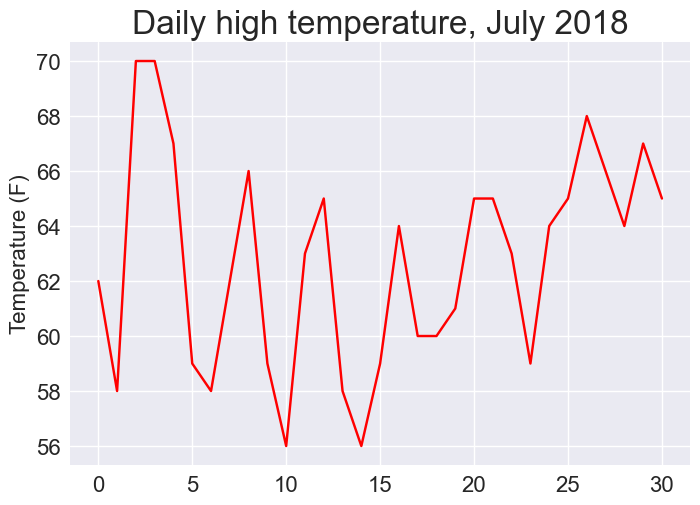

In [14]:
import csv

import matplotlib.pyplot as plt

# 사용할 파일이름
filename = 'sitka_weather_07-2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 파일에서 최고 기온만 읽어옵니다.
    highs = []
    for row in reader:
        high = int(row[5])
        highs.append(high)

# 최고 기온을 그래프로 출력
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(highs, c='red')

# 그래프 서식 지정
ax.set_title("Daily high temperature, July 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)   # F : fahrenheit(화씨온도)
ax.tick_params(axis='both', labelsize=16)

plt.show()

### datetime 모듈

그래프에 날짜를 추가해서 출력하기 위해서 날짜 데이터를 사용합니다. 

데이터는 문자열로 인식되므로 문자열 "2018-07-01"을 날짜 객체로 바꿔야 합니다. datetime 모듈의 strptime() 메서드를 써서 2018년 7월 1일에 해당하는 객체를 만들 수 있습니다.

In [16]:
from datetime import datetime

first_date = datetime.strptime('2018-07-01', '%Y-%m-%d')
print(first_date)

2018-07-01 00:00:00


### 모듈에서 사용하는 날짜와 시간 매개변수

|매개 변수|의미|
|:-|:-|
|%A|Monday 같은 요일 이름|
|%B|January 같은 월 이름|
|%m|01~12 같이 숫자로 표시한 월|
|%d|01~31 같이 숫자로 표시한 일|
|%Y|2024처럼 네 자리 숫자로 표시한 년도|
|%y|24처럼 두 자리 숫자로 표시한 년도|
|%H|24시 기준 시간(0 ~ 23)|
|%1|12시 기준 시간(01 ~ 12)|
|%P|am 또는 pm|
|%M|분(00~59)|
|%S|초(00~59)|

### 그래프의 x축에 날짜를 포함하여 그리기

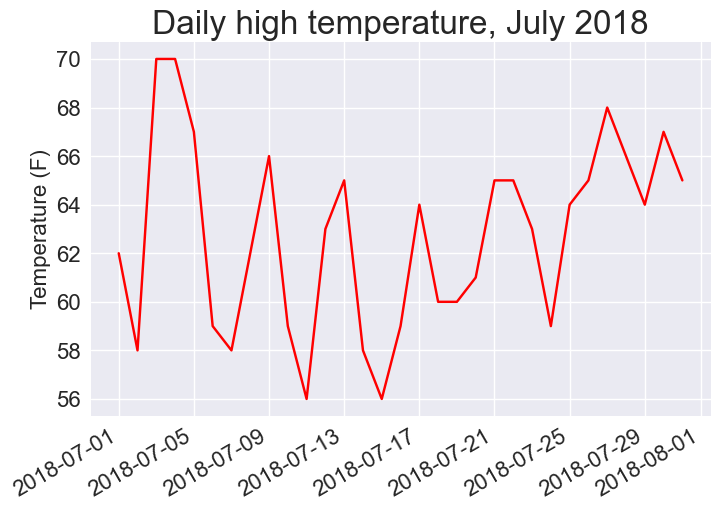

In [21]:
import csv

import matplotlib.pyplot as plt

# 사용할 파일이름
filename = 'sitka_weather_07-2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 파일에서 최고 기온만 읽어옵니다.
    highs = []
    dates = []
    for row in reader:
        try:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            high = int(row[5])
            highs.append(high)
            dates.append(current_date)
        except ValueError:
            pass

# 최고 기온을 그래프로 출력
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red')

# 그래프 서식 지정
ax.set_title("Daily high temperature, July 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)   # F : fahrenheit(화씨온도)
ax.tick_params(axis='both', labelsize=16)

plt.show()

### 1년치 데이터가 들어있는 파일을 열어서 출력해보겠습니다. 

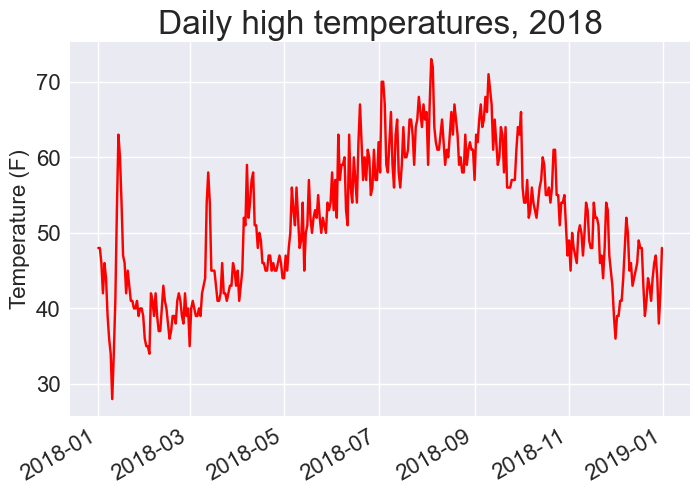

In [28]:
import csv

import matplotlib.pyplot as plt

# 사용할 파일이름
filename = 'sitka_weather_2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 파일에서 최고 기온만 읽어옵니다.
    highs = []
    dates = []
    for row in reader:
        try:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            high = int(row[5])
            highs.append(high)
            dates.append(current_date)
        except ValueError:
            pass

# 최고 기온을 그래프로 출력
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red')

# 그래프 서식 지정
ax.set_title("Daily high temperatures, 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)   # F : fahrenheit(화씨온도)
ax.tick_params(axis='both', labelsize=16)

plt.show()

### 두 번째 데이터 그리기

최저 기온을 추가하여 그래프를 더 유용하게 만들수 있습니다. 데이터 파일에서 최저 기온을 추출해 그래프에 추가하면 됩니다. 

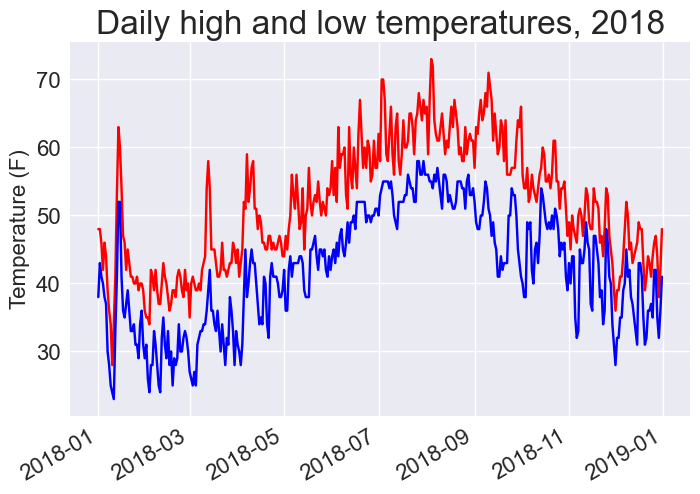

In [25]:
import csv

import matplotlib.pyplot as plt

# 사용할 파일이름
filename = 'sitka_weather_2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 파일에서 최고 기온만 읽어옵니다.
    highs = []
    lows=[]           # 최저 기온들을 저장할 리스트
    dates = []
    for row in reader:
        try:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            high = int(row[5])
            low = int(row[6])            # 현재 행(row)의 최저기온을 읽어서(row[6]) 임시저장
            highs.append(high)    
            lows.append(low)             # 리스트에 현재 행의 최저기온 추가
            dates.append(current_date) 
        except ValueError:
            pass

# 최고 기온을 그래프로 출력
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red')   # 최고 기온 그래프 출력
ax.plot(dates, lows, c='blue')   # 최저 기온 그래프 출력

# 그래프 서식 지정
ax.set_title("Daily high and low temperatures, 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()          # 날짜가 겹치는 것을 대각선 형태로 변경하여 출력
ax.set_ylabel("Temperature (F)", fontsize=16)   # F : fahrenheit(화씨온도)
ax.tick_params(axis='both', labelsize=16)

plt.show()

### 그래프 영역 일부 채우기

fill_between() 메서드는 x값 리스트 하나와 y값 리스트 두개를 받아서 y축 공간을 채웁니다.

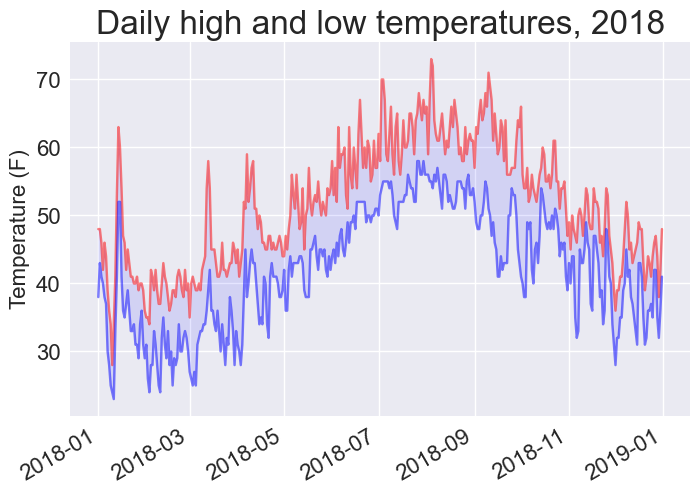

In [30]:
import csv

import matplotlib.pyplot as plt

# 사용할 파일이름
filename = 'sitka_weather_2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 파일에서 최고 기온만 읽어옵니다.
    highs = []
    lows=[]           # 최저 기온들을 저장할 리스트
    dates = []
    for row in reader:
        try:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            high = int(row[5])
            low = int(row[6])            # 현재 행(row)의 최저기온을 읽어서(row[6]) 임시저장
            highs.append(high)    
            lows.append(low)             # 리스트에 현재 행의 최저기온 추가
            dates.append(current_date) 
        except ValueError:
            pass

# 최고 기온을 그래프로 출력
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
# alpha 값이 0이면 완전 투명 1이면 완전 불투명입니다.
ax.plot(dates, highs, c='red', alpha=0.5)   # 최고 기온 그래프 출력
ax.plot(dates, lows, c='blue', alpha=0.5)   # 최저 기온 그래프 출력
ax.fill_between(dates, highs, lows, facecolors='blue', alpha=0.1)

# 그래프 서식 지정
ax.set_title("Daily high and low temperatures, 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()          # 날짜가 겹치는 것을 대각선 형태로 변경하여 출력
ax.set_ylabel("Temperature (F)", fontsize=16)   # F : fahrenheit(화씨온도)
ax.tick_params(axis='both', labelsize=16)

plt.show()

### 에러 체크

이따금 오류를 일으켜 원래 의도했던 데이터를 수집하지 못하는 경우도 있습니다. 있어야 할 데이터가 없으면 예외가 발생되고, 예외를 적절하게 처리하지 않으면 프로그램이 충돌할 수 있습니다. 

누락된 데이터가 들어 있는 death_valley_2018_simple.csv를 열어서 헤더를 먼저 살펴보겠습니다. 

In [32]:
import csv

filename = 'death_valley_2018_simple.csv'

with open(filename) as f:
    reader = csv.reader(f)
    # 순수 데이터만 필요하므로 헤더를 읽어서 없앱니다. 
    header_row = next(reader)

    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS


트레이스백을 읽어보면 최고 기온을 처리하다가 빈 문자열("")을 정수로 변환하지 못해서 에러가 났음을 확인할 수 있습니다.

csv 파일을 읽을 때 에러를 체크해서 일어날 수 있는 예외를 방지할 수 있습니다. 

Missing data for 2018-01-01 00:00:00
Missing data for 2018-01-02 00:00:00
Missing data for 2018-01-03 00:00:00
Missing data for 2018-01-04 00:00:00
Missing data for 2018-01-05 00:00:00
Missing data for 2018-01-06 00:00:00
Missing data for 2018-01-07 00:00:00
Missing data for 2018-01-08 00:00:00
Missing data for 2018-01-09 00:00:00
Missing data for 2018-01-10 00:00:00
Missing data for 2018-01-11 00:00:00
Missing data for 2018-01-12 00:00:00
Missing data for 2018-01-13 00:00:00
Missing data for 2018-01-14 00:00:00
Missing data for 2018-01-15 00:00:00
Missing data for 2018-01-16 00:00:00
Missing data for 2018-01-17 00:00:00
Missing data for 2018-01-18 00:00:00
Missing data for 2018-01-19 00:00:00
Missing data for 2018-01-20 00:00:00
Missing data for 2018-01-21 00:00:00
Missing data for 2018-01-22 00:00:00
Missing data for 2018-01-23 00:00:00
Missing data for 2018-01-24 00:00:00
Missing data for 2018-01-25 00:00:00
Missing data for 2018-01-26 00:00:00
Missing data for 2018-01-27 00:00:00
M

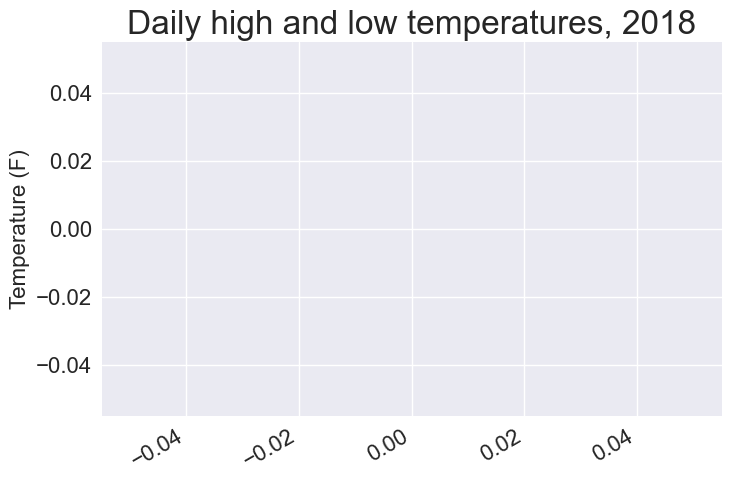

In [33]:
import csv

import matplotlib.pyplot as plt

# 사용할 파일이름
filename = 'sitka_weather_2018_simple.csv'

# 파일을 열어 파일 객체를 생성합니다. 

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 파일에서 최고 기온만 읽어옵니다.
    highs = []
    lows=[]           # 최저 기온들을 저장할 리스트
    dates = []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            high = int(row[4])
            low = int(row[5])
        except ValueError:
            print(f"Missing data for {current_date}")
        else:
            high.append(high)
            lows.append(low)
            dates.append(current_date)

# 최고 기온을 그래프로 출력
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
# alpha 값이 0이면 완전 투명 1이면 완전 불투명입니다.
ax.plot(dates, highs, c='red', alpha=0.5)   # 최고 기온 그래프 출력
ax.plot(dates, lows, c='blue', alpha=0.5)   # 최저 기온 그래프 출력
ax.fill_between(dates, highs, lows, facecolors='blue', alpha=0.1)

# 그래프 서식 지정
ax.set_title("Daily high and low temperatures, 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()          # 날짜가 겹치는 것을 대각선 형태로 변경하여 출력
ax.set_ylabel("Temperature (F)", fontsize=16)   # F : fahrenheit(화씨온도)
ax.tick_params(axis='both', labelsize=16)

plt.show()

여기서는 예외를 try_catch_except 블록을 사용해서 누락된 데이터를 처리했습니다. 때로는 continue를 사용하여 일부 데이터를 건너 뛸 수도 있고, remove()나 del을 사용하여 일부 데이터를 제거할 수도 있습니다.

연습 문제:

시트카에 내리는 비:
sitka_weather_2018_simple.csv 파일 안에는 그 날의 강우량을 나타내는 PRCP라는 헤더가 있습니다. 시트카의 강유량에 초점을 맞춰 시각화를 만들어보세요. 사막에 비가 얼마나 적게 내리는지 알아보기 위해서는 데스 밸리 파일을 사용하여 시각화를 만들어보셔도 됩니다. (강우량: precipitation)

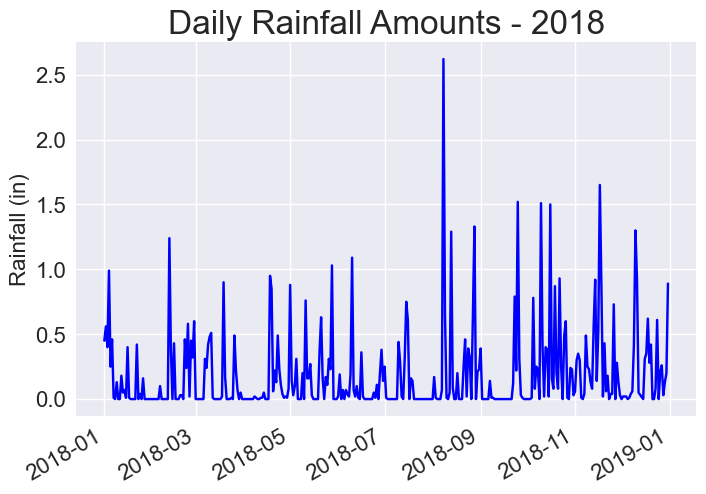

In [38]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

filename = 'sitka_weather_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # 날짜와 강수량 데이터를 저장합니다.
    dates, precips = [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        dates.append(current_date)
        precip = float(row[3])
        precips.append(precip)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, precips, c='blue')

plt.title("Daily Rainfall Amounts - 2018", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel('Rainfall (in)', fontsize=16)
plt.tick_params(axis='both', labelsize=16)

plt.show()

파일을 열고 데이터를 가져오는 부분을 함수로 구현하면 여러 파일에 대해 동일한 그래프를 출력하여 비교할 수 있습니다.

Missing data for 2018-02-18 00:00:00


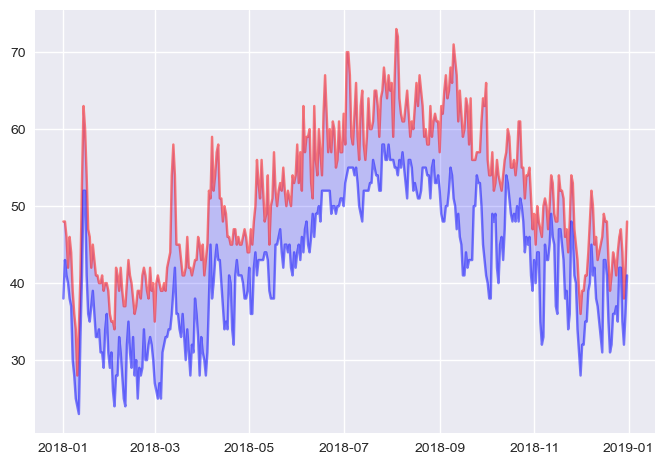

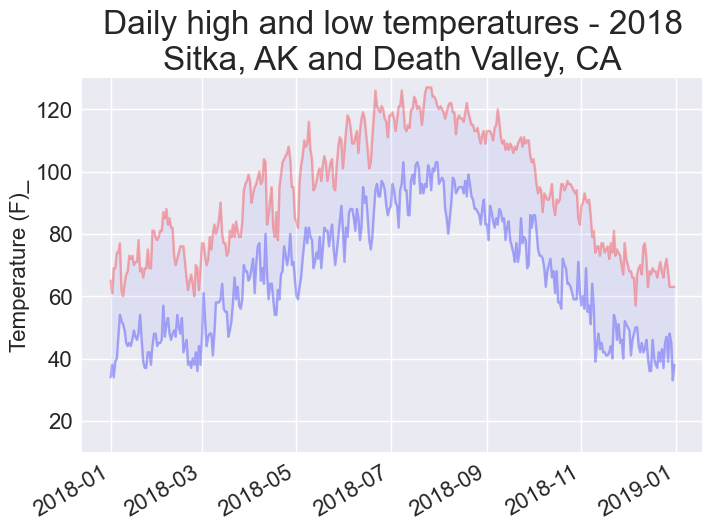

In [6]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# 파일로 부터 데이터를 읽는 함수를 작성합니다. 
def get_weather_data(filename, dates, highs, lows, date_index, high_index,
                     low_index):
    """파일로부터 최고온도와 최저온도를 얻습니다."""
    with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        for row in reader:
            current_date = datetime.strptime(row[date_index], '%Y-%m-%d')
            try:
                high = int(row[high_index])
                low = int(row[low_index])
            except ValueError:
                print(f"Missing data for {current_date}")
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)

# 시트카의 날씨 데이터 읽기
filename = 'sitka_weather_2018_simple.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=2, high_index=5,
                 low_index=6)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.2)

# 데스밸리의 날씨 데이터 읽기
filename = 'death_valley_2018_simple.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=2, high_index=4,
                 low_index=5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.3)
ax.plot(dates, lows, c='blue', alpha=0.3)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.05)

title = "Daily high and low temperatures - 2018"
title += '\nSitka, AK and Death Valley, CA'
plt.title(title, fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)_", fontsize=16)
plt.tick_params(axis='both', labelsize=16)
# y축에 최저, 최대값 지정
plt.ylim(10, 130)

plt.show()

## 전 세계 데이터를 지도로 만들기

### 지진 데이터는 저장한 파일 eq_1_day_mal.json파일에 들어 있습니다. 

데이터 자체는 http://earthquake.usgs.gov/earthquakes/feed/ 라는 사이트에서 얻어 왔습니다.

json 모듈에는 JSON 데이터를 다루는데 쓰이는 도구가 여러가지 있습니다. 이들 도구중에는 파일형식을 고쳐서, 프로그램을 만들기 전에 구조를 파악하기 쉽게 만들어주는 곳도 있습니다. 우선 데이터를 가져와서 읽기 쉬운 형태로 만드는 작업을 하겠습니다. 이 파일은 데이터가 크기 때문에 화면에 출력하지 않고 새 파일에 저장하겠습니다. 

In [8]:
import json

filename = 'eq_data_1_day_m1.json'
# 원본 파일을 읽기 모드로 열어 읽어옵니다.
with open(filename) as f:
    all_eq_data = json.load(f)
    
# 새로운 파일을 쓰기 모드로 열어서 위의 데이터를 읽기 좋은 형태로 저장합니다. 
readable_file = 'readable_eq_data.json'
with open(readable_file, 'w') as f:
    json.dump(all_eq_data, f, indent=4)
    

파일의 첫 번째 부분은 'metadata' 키로 시작합니다. 이 데이터는 데이터 파일을 어디에서 만들었는지, 온라인에서 이 데이터를 받으려면 어디로 가야 하는지 등의 정보가 나와 있습니다. 또한 데이터 제목과 총 지진 횟수도 나와 있습니다. 

"properties" 키에는 각 지진에 관한 정보가 담겨 있습니다. 우리의 주 관심사인 진도(magnitude)는 "mag" 키에 들어 있습니다. 

"geometry" 키에는 지진이 일어난 곳에 관한 정보가 있습니다. 이 정보는 지도에 표현할 때 필요합니다.

"coordinates" 키를 보면 지진이 발생한 경도와 위도 정보가 있습니다. 

먼저 일어난 지진 전체의 정보를 담은 리스트를 만듭니다. 

In [9]:
import json

filename = 'eq_data_1_day_m1.json'
with open(filename) as f:
    all_eq_data = json.load(f)

all_eq_dicts = all_eq_data['features']
print(len(all_eq_dicts))


158


'features' 키에 연결된 데이터의 길이를 출력해보면 이 파일에 총 158건의 지진 데이터가 있다는 걸 알수 있습니다. 

### 진도 추출 

In [10]:
import json

filename = 'eq_data_1_day_m1.json'
with open(filename) as f:
    all_eq_data = json.load(f)

all_eq_dicts = all_eq_data['features']

mags = []

# 158개의 지진 진도 정보를 리스트에 저장합니다.
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    mags.append(mag)

print(mags[:10])


[0.96, 1.2, 4.3, 3.6, 2.1, 4, 1.06, 2.3, 4.9, 1.8]


### 위치 데이터 추출과 그래프로 출력

위치 데이터는 "geometry" 키에 저장되어 있습니다. 이 딕셔너리 안에는 "coordinates" 키가 있고, 이 키의 첫 번째와 두 번째 값이 경도(longitude)와 위도(latitude)입니다.

In [14]:
import json

from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

filename = 'eq_data_1_day_m1.json'
with open(filename) as f:
    all_eq_data = json.load(f)

all_eq_dicts = all_eq_data['features']

mags = []
lons = []
lats = []

# 158개의 지진 진도 정보를 리스트에 저장합니다.
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)

data = [Scattergeo(lon=lons, lat=lats)]
my_layout = Layout(title='Global Earthquakes')

fig = {'data' : data, 'layout' : my_layout}
offline.plot(fig, filename='global_earthquakes.html')


'global_earthquakes.html'